# Image Classifiaction and Reconstruction


The ten fashion class labels include:

1. T-shirt/top
2. Trouser/pants
3. Pullover shirt
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
data = pd.read_csv("fashion-mnist_train.csv")

In [3]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we have the pixels here in a matrix form constitutuing the image.

In [4]:
data.shape # getting the shape of the data

(60000, 785)

In [7]:
type(data) 

pandas.core.frame.DataFrame

In [8]:
data = np.array(data,dtype = 'float32') # changing the datatype of the dataset.

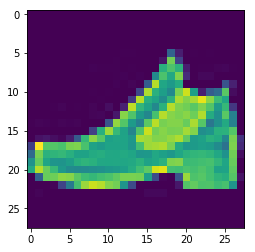

In [13]:
plt.imshow(data[1,1:].reshape(28,28)) # showing the first data by reshaping it as 28*28 because 28*28 = 784

We got a nice looking shoe here.

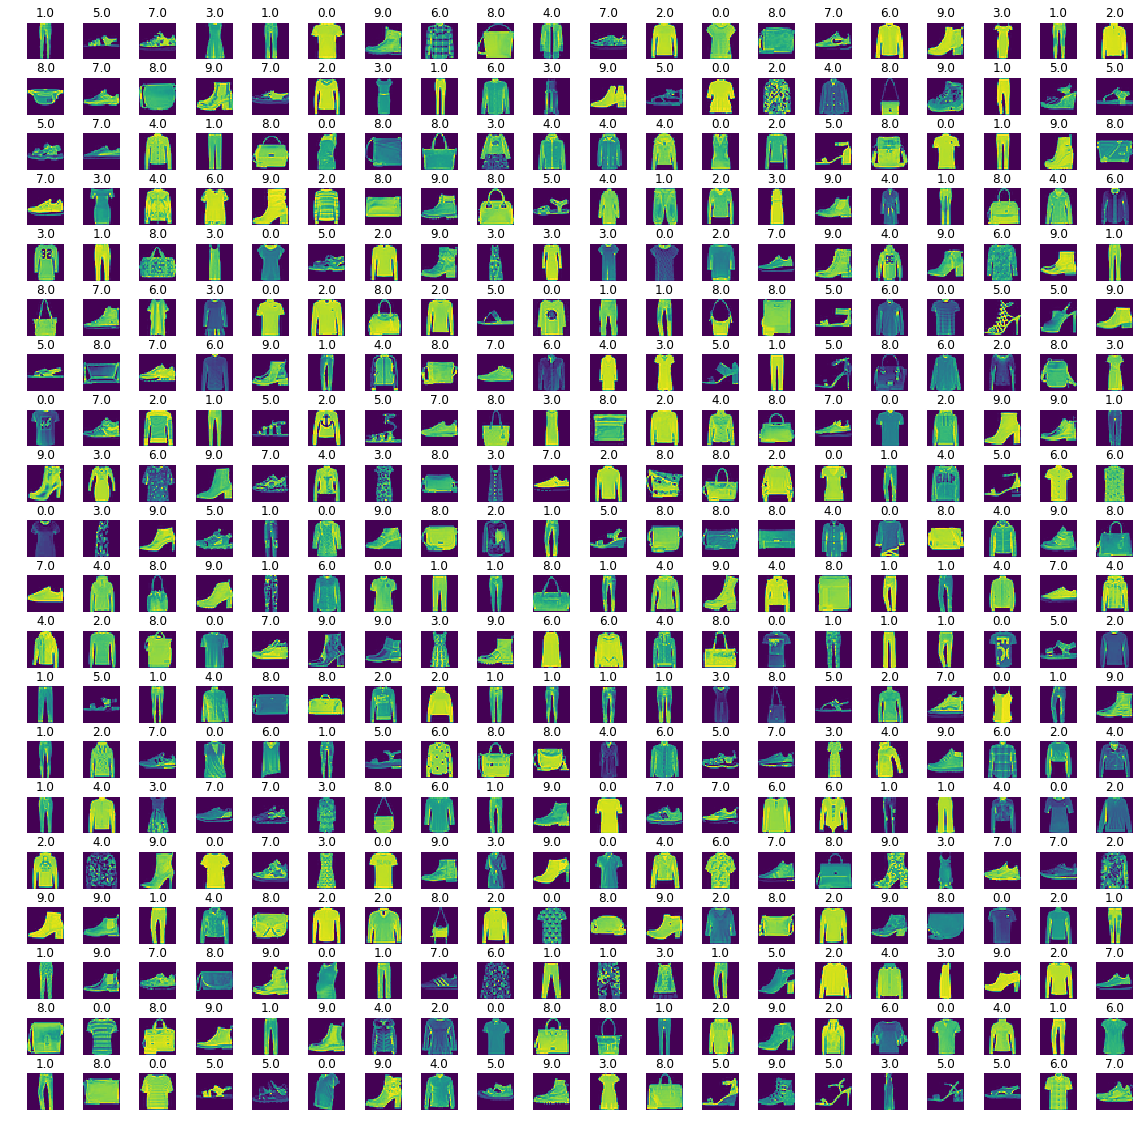

In [18]:
# visualing all the labels
W_grid = 20
l_grid = 20

fig, axes = plt.subplots(l_grid, W_grid,figsize = (20,20))
axes = axes.ravel()

n = len(data) # getting the length of the data.

for i in np.arange(0,l_grid*W_grid):
    index = np.random.randint(0, n)
    axes[i].imshow(data[index,1:].reshape(28,28))
    axes[i].set_title(data[index,0])
    axes[i].axis("off")

plt.subplots_adjust(hspace = 0.5)

The images look very interesting. Most of them are clear . lets see how our machine learning algorithm will learn from it.

In [19]:
# training the model
X_train = data[:,1:]/255
y_train = data[:,0]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 25)

In [22]:
# reshaping the validation and testing sets.
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_val = X_val.reshape(X_val.shape[0],*(28,28,1))    

In [23]:
X_val.shape

(15000, 28, 28, 1)

# Image classification using CNN

In [24]:
import keras   # using keras with tensorflow background.


Using TensorFlow backend.


In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [68]:
model = Sequential()  # starting of the CNN.

In [69]:
model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu')) # convolutional layer

/home/dhiraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [70]:
model.add(MaxPool2D(pool_size = (2,2)))  # Maxpool Layer

In [71]:
model.add(Flatten())              # Falatening of the maxplooled layer for generating hidden states.

In [72]:
model.add(Dense(units = 32, activation = 'relu')) # hidden layer

In [73]:
model.add(Dense( units= 10, activation = 'relu'))  # Hidden layer

In [74]:
model.add(Dense( units= 10, activation = 'sigmoid'))  # Last Layer normal layer for generating output.

In [75]:
model.compile(loss='sparse_categorical_crossentropy',optimizer = Adam(lr = 0.01),metrics = ['accuracy']) # model compilation

In [76]:
epochs = 25

In [77]:
# training the model.
history = model.fit(X_train, y_train,
         batch_size=512,
         epochs = epochs,
         verbose = 1,
         validation_data=(X_val, y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 18s 390us/step - loss: 1.0118 - acc: 0.5721 - val_loss: 0.4886 - val_acc: 0.8247
Epoch 2/25
45000/45000 [==============================] - 18s 402us/step - loss: 0.4142 - acc: 0.8524 - val_loss: 0.3762 - val_acc: 0.8700
Epoch 3/25
45000/45000 [==============================] - 17s 386us/step - loss: 0.3305 - acc: 0.8826 - val_loss: 0.3590 - val_acc: 0.8758
Epoch 4/25
45000/45000 [==============================] - 17s 382us/step - loss: 0.2922 - acc: 0.8952 - val_loss: 0.3210 - val_acc: 0.8902
Epoch 5/25
45000/45000 [==============================] - 17s 384us/step - loss: 0.2610 - acc: 0.9058 - val_loss: 0.3372 - val_acc: 0.8811
Epoch 6/25
45000/45000 [==============================] - 17s 385us/step - loss: 0.2369 - acc: 0.9137 - val_loss: 0.3325 - val_acc: 0.8861
Epoch 7/25
45000/45000 [==============================] - 17s 383us/step - loss: 0.2204 - acc: 0.9189 - val_loss: 0.

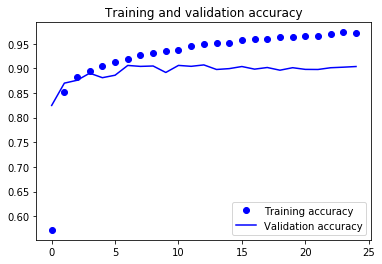

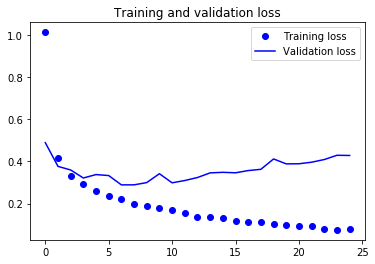

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

We can see from the above plot that there is some overfitting at the end of the epochs

In [43]:
# using droupout layers with CNN
modeld = Sequential()

In [ ]:
modeld.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))

In [45]:
modeld.add(MaxPool2D(pool_size = (2,2)))

In [46]:
modeld.add(Flatten())

In [47]:
modeld.add(Dense(units = 32, activation = 'relu'))

In [48]:
# adding DroupOut layer
modeld.add(Dropout(0.2))

In [49]:
modeld.add(Dense( units= 32, activation = 'relu'))

In [50]:
# adding DroupOut layer
modeld.add(Dropout(0.2))

In [51]:
modeld.add(Dense( units= 10, activation = 'sigmoid'))

In [55]:
modeld.compile(loss='sparse_categorical_crossentropy',optimizer = Adam(lr = 0.05),metrics = ['accuracy'])

In [56]:
history = modeld.fit(X_train, y_train,
         batch_size=512,
         epochs = epochs,
         verbose = 1,
         validation_data=(X_val, y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 20s 434us/step - loss: 1.2016 - acc: 0.4875 - val_loss: 0.6223 - val_acc: 0.6999
Epoch 2/50
45000/45000 [==============================] - 20s 440us/step - loss: 0.6678 - acc: 0.7281 - val_loss: 0.5087 - val_acc: 0.7567
Epoch 3/50
45000/45000 [==============================] - 20s 452us/step - loss: 0.5627 - acc: 0.7948 - val_loss: 0.4605 - val_acc: 0.8288
Epoch 4/50
45000/45000 [==============================] - 19s 425us/step - loss: 0.5160 - acc: 0.8184 - val_loss: 0.4353 - val_acc: 0.8438
Epoch 5/50
45000/45000 [==============================] - 19s 427us/step - loss: 0.4890 - acc: 0.8270 - val_loss: 0.4157 - val_acc: 0.8551
Epoch 6/50
45000/45000 [==============================] - 19s 427us/step - loss: 0.4780 - acc: 0.8337 - val_loss: 0.4129 - val_acc: 0.8485
Epoch 7/50
45000/45000 [==============================] - 20s 434us/step - loss: 0.4724 - acc: 0.8353 - val_loss: 0.

The result is not satisfactory .

We can achieve greater accuracy by using more than one convolutional layers.

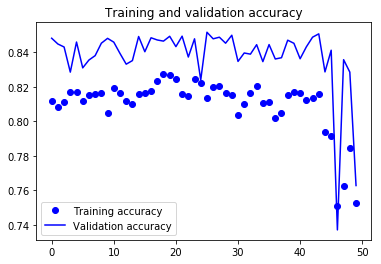

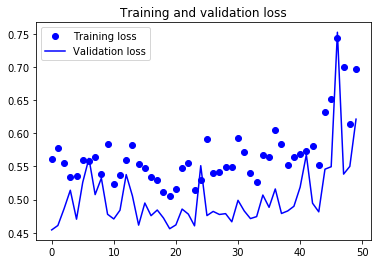

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Dropout didn' worked with just one convolutional neural network. AllCNN can be used or predrfined networks like VGG16 can be used for further experimentation.

# Using AutoEncoders for image Reconstruction

In [82]:
from keras.layers import LSTM, UpSampling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
from keras.models import Model

In [83]:
## reshape the inputs
train_x = X_train.reshape(-1, 784)
val_x = X_val.reshape(-1, 784)

In [84]:
## input layer
input_layer = keras.Input(shape=(784,))

In [85]:
## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

In [86]:

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [87]:
# Training the model.
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 26s 584us/step - loss: 0.0997 - val_loss: 0.0738
Epoch 2/20
45000/45000 [==============================] - 24s 539us/step - loss: 0.0676 - val_loss: 0.0572
Epoch 3/20
45000/45000 [==============================] - 24s 534us/step - loss: 0.0492 - val_loss: 0.0425
Epoch 4/20
45000/45000 [==============================] - 24s 538us/step - loss: 0.0403 - val_loss: 0.0383
Epoch 5/20
45000/45000 [==============================] - 25s 565us/step - loss: 0.0368 - val_loss: 0.0358
Epoch 6/20
45000/45000 [==============================] - 24s 534us/step - loss: 0.0347 - val_loss: 0.0338
Epoch 7/20
45000/45000 [==============================] - 27s 603us/step - loss: 0.0322 - val_loss: 0.0313
Epoch 8/20
45000/45000 [==============================] - 25s 548us/step - loss: 0.0296 - val_loss: 0.0281
Epoch 9/20
45000/45000 [==============================] - 25s 551us/step - loss: 0.0289 - val_

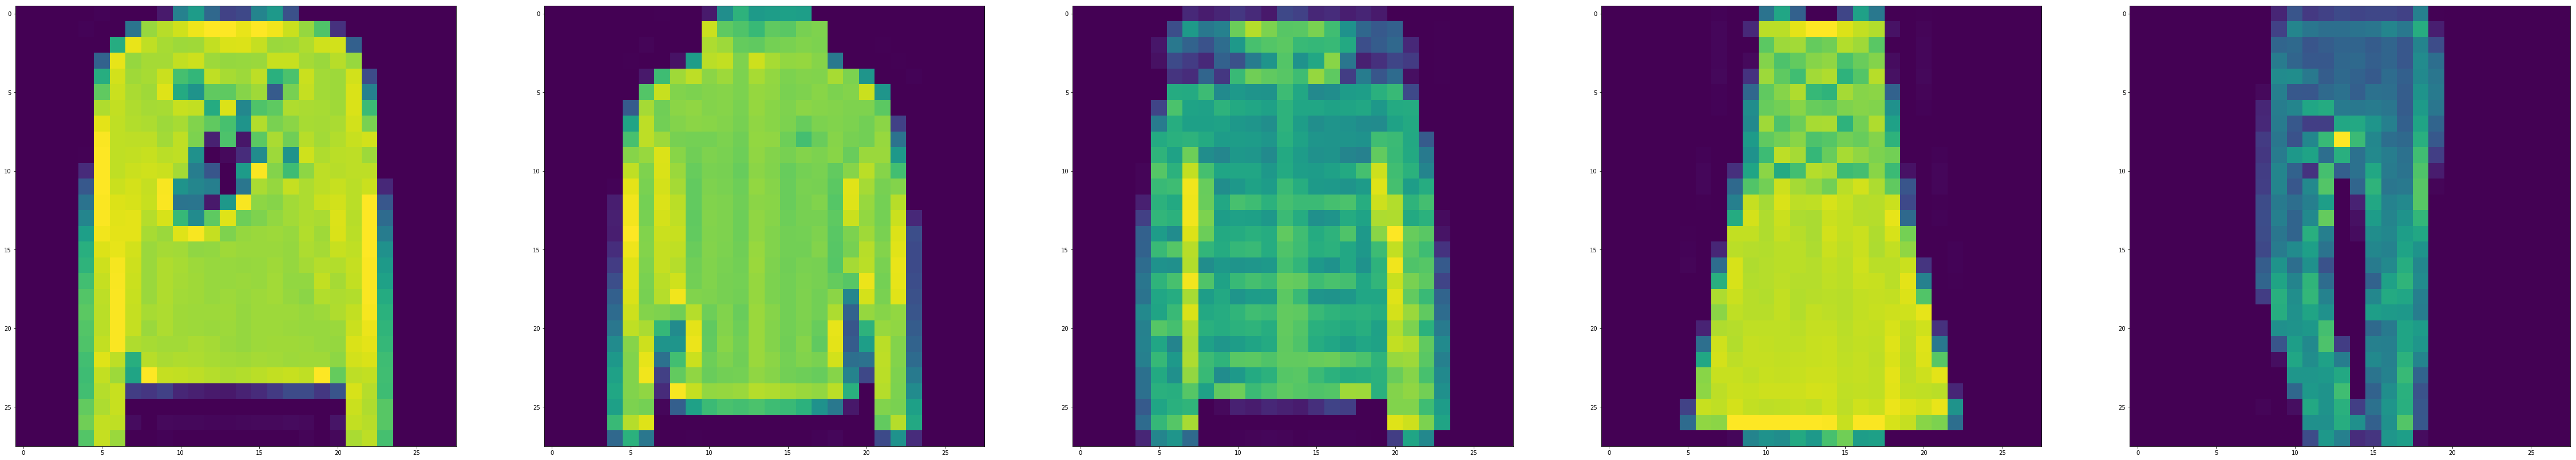

Actual Output


In [89]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()
print("Actual Output")

In [91]:
preds = model.predict(val_x)

Predicted Output


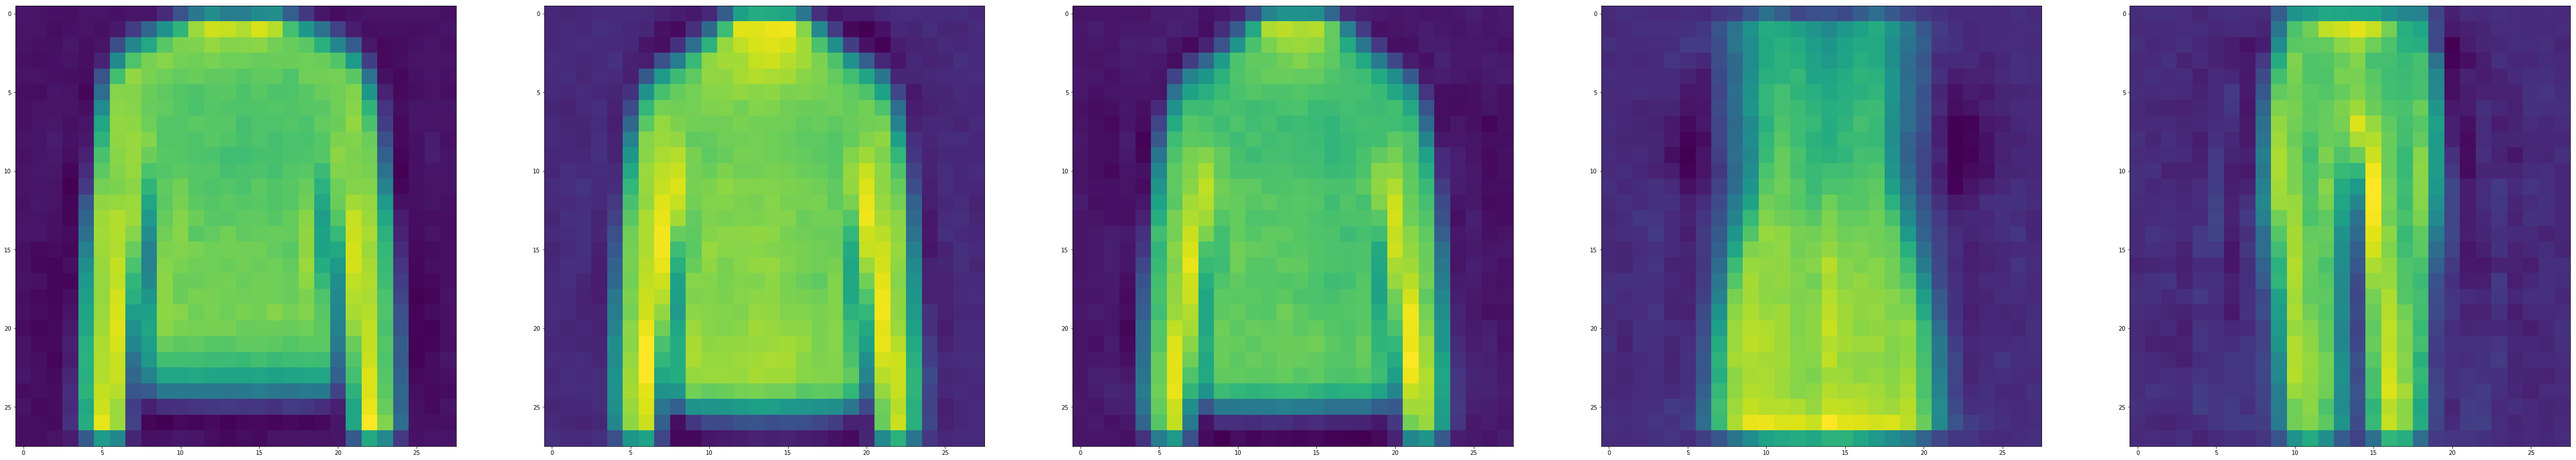

In [92]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
print("Predicted Output")
plt.show()

Some are generated good with only 20 epochs.